In [231]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Files to load
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

In [232]:
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)

# Rename data frame columns
city_data_df = city_data_df.rename(columns={'city':'City', 'driver_count':'No. Drivers', 'type':'City Type'})

city_data_df.head()

,City,No. Drivers,City Type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [233]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

# Rename data frame columns
ride_data_df = ride_data_df.rename(columns={'city':'City', 'date':'Date', 'fare':'Fare', 'ride_id':'Ride Id'})

# 'Date' field imported into data frame as string
# Converting to DateTime
ride_data_df['Date'] = pd.to_datetime(ride_data_df['Date'])

ride_data_df.head()

,City,Date,Fare,Ride Id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [234]:
# Get the columns and the rows that are not null.
city_data_df.count()

City           120
No. Drivers    120
City Type      120
dtype: int64

In [235]:
# Get the columns and the rows that are null
city_data_df.isnull().sum()

City           0
No. Drivers    0
City Type      0
dtype: int64

In [236]:
# Get the data types of each column.
city_data_df.dtypes

City           object
No. Drivers     int64
City Type      object
dtype: object

In [237]:
# Get the unique values of the type of city.
city_data_df["City Type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [238]:
# Get the columns and the rows that are not null.
ride_data_df.count()

City       2375
Date       2375
Fare       2375
Ride Id    2375
dtype: int64

In [239]:
# Get the columns and the rows that are null
ride_data_df.isnull().sum()

City       0
Date       0
Fare       0
Ride Id    0
dtype: int64

In [240]:
# Get the data types of each column.
ride_data_df.dtypes

City               object
Date       datetime64[ns]
Fare              float64
Ride Id             int64
dtype: object

In [241]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["City", "City"])

# Display the DataFrame
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [242]:
pyber_data_sort_bt_city_df = pyber_data_df.sort_values(["City"])
pyber_data_sort_bt_city_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
919,Amandaburgh,2019-04-24 08:02:27,14.55,7836117055007,12,Urban
239,Amandaburgh,2019-02-10 20:42:46,36.17,6455620849753,12,Urban
235,Amandaburgh,2019-02-24 23:10:49,43.66,6573820412437,12,Urban
164,Amandaburgh,2019-03-05 02:15:38,26.28,906850928986,12,Urban
1155,Amandaburgh,2019-03-07 02:26:33,18.76,3419454549176,12,Urban


In [243]:
# Generating Pyber summary results data frame

# Get total rides per city type
per_city_type_total_rides = pyber_data_df.groupby(["City Type"]).count()["Ride Id"]

# Get total fares per city type
per_city_type_total_fares = pyber_data_df.groupby(["City Type"])["Fare"].sum()

#Get average fare per ride per city type
per_city_type_avg_fare_per_ride = per_city_type_total_fares / per_city_type_total_rides

In [244]:
# Methodology Notes
#
# Get total driver count per city type
#
# This data is suppose to be generate merged data frame per the challenge instructions
# However, the merged data frame has duplicate data.
#
# Each row in the merged data frame contains data for one ride:
#     The 'City' name that the ride occured in
#     The 'Date' the ride occured on
#     The 'Fare' for the ride
#     The 'City Type' of the city the ride occured in
#
# However the merged data frame also contains the column "No. Drivers"
# which is the total number of drivers in the 'City' the ride took place in.
# Each row in the merged data frame has the data for the individual ride
# and the aggregate count of of drivers for the 'City' the ride occured in.
#
# See the output of the merged data frame sorted by 'City' name

pyber_data_sort_by_city_df = pyber_data_df.sort_values(["City"])
pyber_data_sort_by_city_df.head()

# 
# In order to use the merged data frame to get the number of drivers per 'City Type',
# The data frame would have to be filtered to get to create a new data frame with 
# the unique values of the columns
#
#    'City'
#    'City Type'
#    'No. Drivers'
#
# Then this unique values data frame would have to be 
#
#    .grouped by 'City Type'
#
# and
#
#    .sum() on the 'No. Drivers' column
#
#
# But the city_data_df already contains the same data what would be in the 
# derived data frame of unique values from the merged data frame!!!!!
#
# It is highly ineffecient programming expend CPU resource to create a unique 
# frame of data from a much larger merged data frame, when the data already exists!!!
#
# In order to maintain the effecience of this analyis
# the total drivers per city type information was generated from the data frame
#
#    city_data_df
#
# instead of including uneccessary ineffecient code to recreating the same data from the data frame
#
#    pyber_data_df
#

,City,Date,Fare,Ride Id,No. Drivers,City Type
919,Amandaburgh,2019-04-24 08:02:27,14.55,7836117055007,12,Urban
239,Amandaburgh,2019-02-10 20:42:46,36.17,6455620849753,12,Urban
235,Amandaburgh,2019-02-24 23:10:49,43.66,6573820412437,12,Urban
164,Amandaburgh,2019-03-05 02:15:38,26.28,906850928986,12,Urban
1155,Amandaburgh,2019-03-07 02:26:33,18.76,3419454549176,12,Urban


In [245]:
# Get total driver count per city type USING THE *** city_data_df *** data frame
per_city_type_total_drivers = city_data_df.groupby(["City Type"])["No. Drivers"].sum()

In [246]:
#Get average fare per driver per city type
per_city_type_avg_fare_per_driver = per_city_type_total_fares / per_city_type_total_drivers

In [247]:
data_frame_series_dict = {
                            'Total Rides'             :per_city_type_total_rides,
                            'Total Drivers'           :per_city_type_total_drivers,
                            'Total Fares'             :per_city_type_total_fares,
                            'Average Fare Per Ride'   :per_city_type_avg_fare_per_ride,
                            'Averge Fare Per Driver'  :per_city_type_avg_fare_per_driver 
                         }

pyber_summary_results_df = pd.DataFrame(data_frame_series_dict)

# Formating the PyBer results summary data frame columns
pyber_summary_results_df['Total Rides']            = pyber_summary_results_df['Total Rides'].map("{:,}".format)
pyber_summary_results_df['Total Drivers']          = pyber_summary_results_df['Total Drivers'].map("{:,}".format)
pyber_summary_results_df['Total Fares']            = pyber_summary_results_df['Total Fares'].map("${:.2f}".format)
pyber_summary_results_df['Average Fare Per Ride']  = pyber_summary_results_df['Average Fare Per Ride'].map("${:.2f}".format)
pyber_summary_results_df['Averge Fare Per Driver'] = pyber_summary_results_df['Averge Fare Per Driver'].map("${:.2f}".format)


pyber_summary_results_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Averge Fare Per Driver
City Type,,,,,
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,"1,625","2,405",$39854.38,$24.53,$16.57


In [248]:
# Set the merged data frame index to the 'Date' Column
pyber_data_df = pyber_data_df.set_index("Date")

per_day_type_total_fare_df = pyber_data_df[["City Type", "Fare"]].copy()
per_day_type_total_fare_df

# Generate total fare for city type by day
per_day_type_total_fare_df = pyber_data_df.reset_index()

# Generate pivot table total fare for all city types by day
per_day_type_total_fare_pt = pd.pivot_table(per_day_type_total_fare_df, values='Fare', index=['Date'],  columns=['City Type'])

# filter data frame for ride data betwwen Jan and March 28
per_day_type_total_fare_pt = per_day_type_total_fare_pt.loc['2019-01-01':'2019-04-28']

# Resample the data by week
per_day_type_total_fare_pt = per_day_type_total_fare_pt.resample("w")

# Generate pivot table total fare for all city types by week
per_week_city_type_total_fare_pt = per_day_type_total_fare_pt.sum()

per_week_city_type_total_fare_pt

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


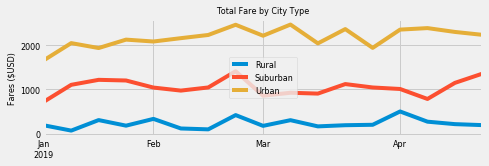

In [289]:
# Specify plot stype
plt.style.use('fivethirtyeight')

# Specify plot font size
font_size = 8 

# Create axis object from the data frame plot method
ax = per_week_city_type_total_fare_pt.plot(figsize=(7,2),  fontsize=font_size)

# Set plot details
ax.grid(True)
ax.set_xlabel("", fontsize=font_size)
ax.set_ylabel("Fares ($USD)", fontsize=font_size)
ax.set_title("Total Fare by City Type", fontsize=font_size)
ax.legend(loc="center", fontsize=font_size)

# Save plot
plt.savefig("analysis\PyBer_Analysis.png")